In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_excel("2022.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2022,17472,6,36,3549
1,2022,17289,432,19,3563
2,2022,17283,369,15,3524
3,2022,17216,398,29,3545
4,2022,17586,98,30,3499
...,...,...,...,...,...
1823,2022,17891,328,33,3504
1824,2022,17507,118,25,3525
1825,2022,17976,382,23,3527
1826,2022,17500,419,16,3535


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1828, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1828 non-null   int64
 1   Maximum length (m))  1828 non-null   int64
 2   Recession(m),        1828 non-null   int64
 3   Rate/yr(m)           1828 non-null   int64
 4   Snout altitude (m)   1828 non-null   int64
dtypes: int64(5)
memory usage: 71.5 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  71
Number  of instances of models:  1828


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2022,17472,6,36,3549
1,2022,17289,432,19,3563
2,2022,17283,369,15,3524
3,2022,17216,398,29,3545
4,2022,17586,98,30,3499


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0098,0.0317,-0.0053
"Recession(m),",NaN,-0.0098,1.0000,0.0401,-0.0026
Rate/yr(m),NaN,0.0317,0.0401,1.0000,-0.0332
Snout altitude (m),NaN,-0.0053,-0.0026,-0.0332,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0317
Snout altitude (m)    -0.0053
Recession(m),         -0.0098
Year                      NaN
Name: Maximum length (m)), dtype: float64

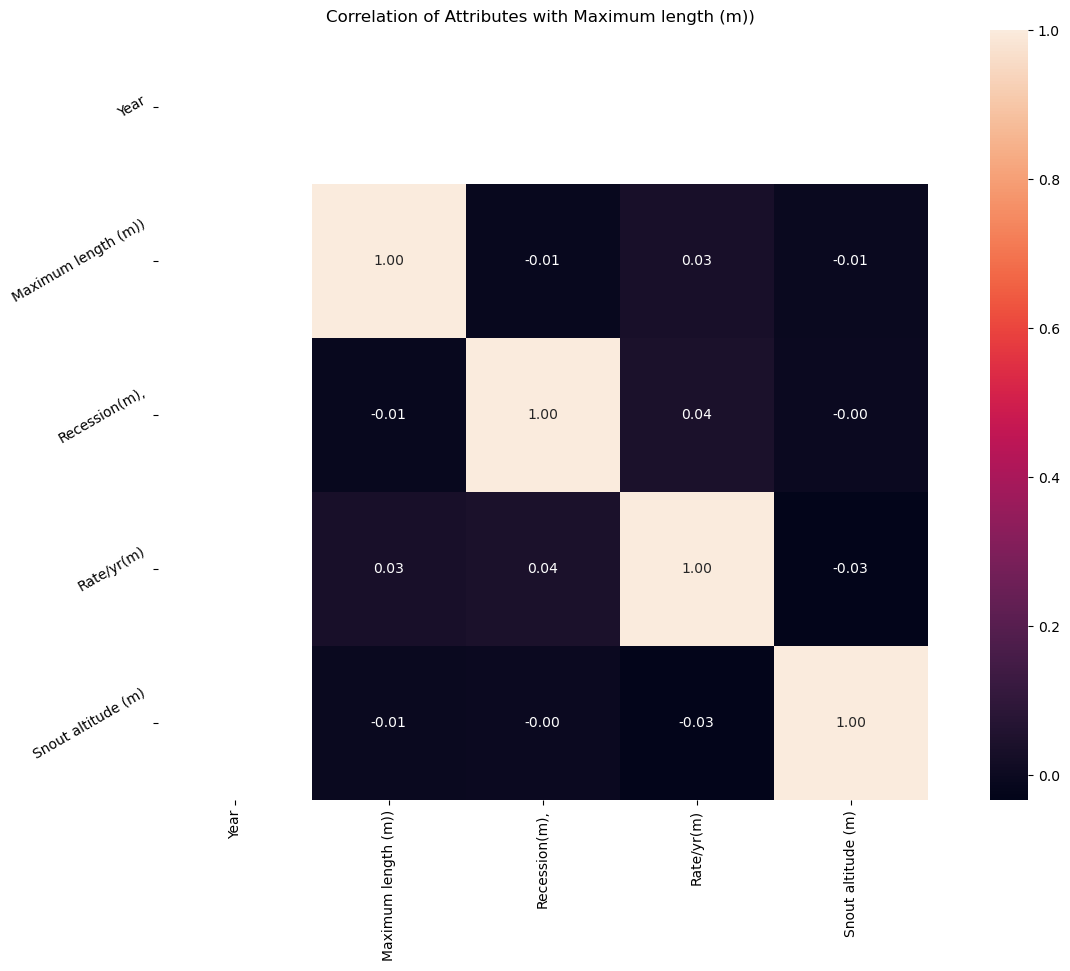

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,828.0000","1,828.0000","1,828.0000","1,828.0000","1,828.0000"
mean,"2,022.0000","17,542.3594",219.8632,27.1636,"3,532.5044"
std,0.0000,292.4377,127.0865,8.5233,20.8521
min,"2,022.0000","17,036.0000",0.0000,13.0000,"3,497.0000"
25%,"2,022.0000","17,288.7500",109.0000,20.0000,"3,514.0000"
50%,"2,022.0000","17,535.5000",222.0000,27.0000,"3,533.0000"
75%,"2,022.0000","17,797.0000",328.2500,34.0000,"3,551.0000"
max,"2,022.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2022   1.0000
Name: Year, dtype: float64

103   0.0071
117   0.0055
256   0.0049
342   0.0049
4     0.0049
       ...  
435   0.0005
12    0.0005
139   0.0005
53    0.0005
280   0.0005
Name: Recession(m),, Length: 433, dtype: float64

27   0.0421
33   0.0394
36   0.0377
29   0.0377
20   0.0377
14   0.0367
17   0.0367
21   0.0361
18   0.0361
28   0.0356
22   0.0356
31   0.0345
37   0.0339
26   0.0334
15   0.0334
16   0.0323
19   0.0323
24   0.0317
25   0.0317
39   0.0317
41   0.0317
34   0.0306
13   0.0306
23   0.0306
32   0.0306
30   0.0301
42   0.0290
38   0.0284
40   0.0274
35   0.0246
Name: Rate/yr(m), dtype: float64

3560   0.0208
3565   0.0202
3501   0.0186
3504   0.0186
3562   0.0181
        ...  
3508   0.0093
3519   0.0093
3528   0.0093
3564   0.0088
3513   0.0088
Name: Snout altitude (m), Length: 71, dtype: float64



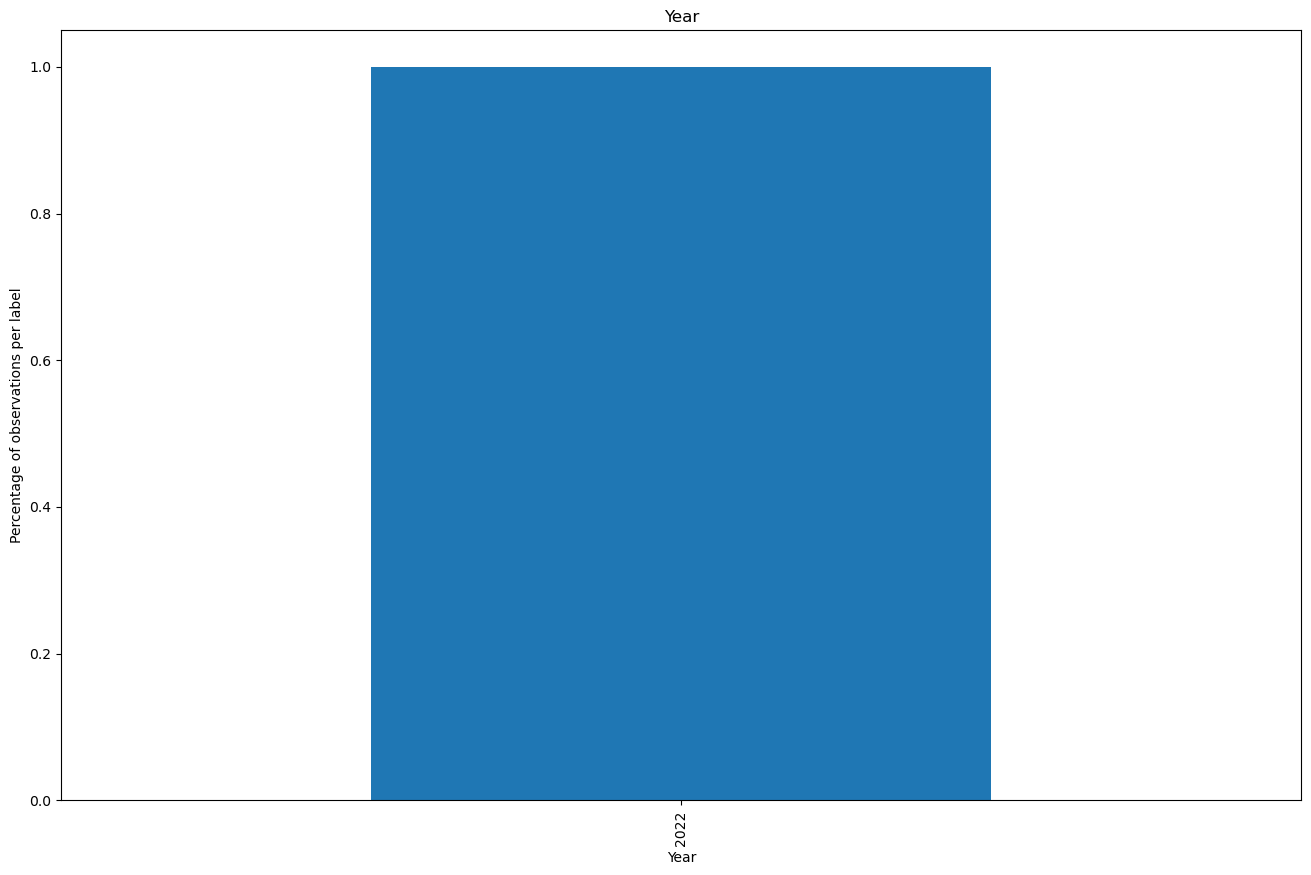

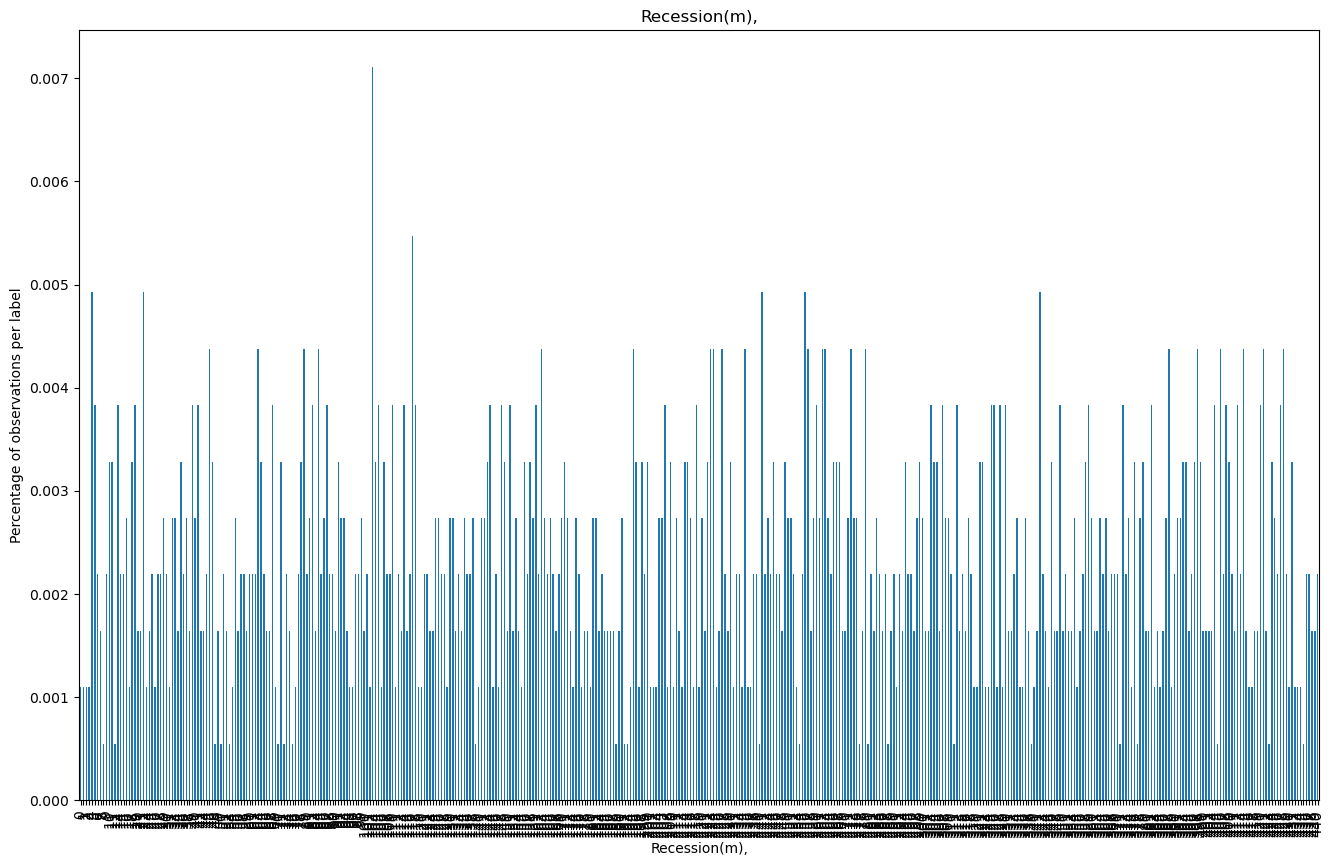

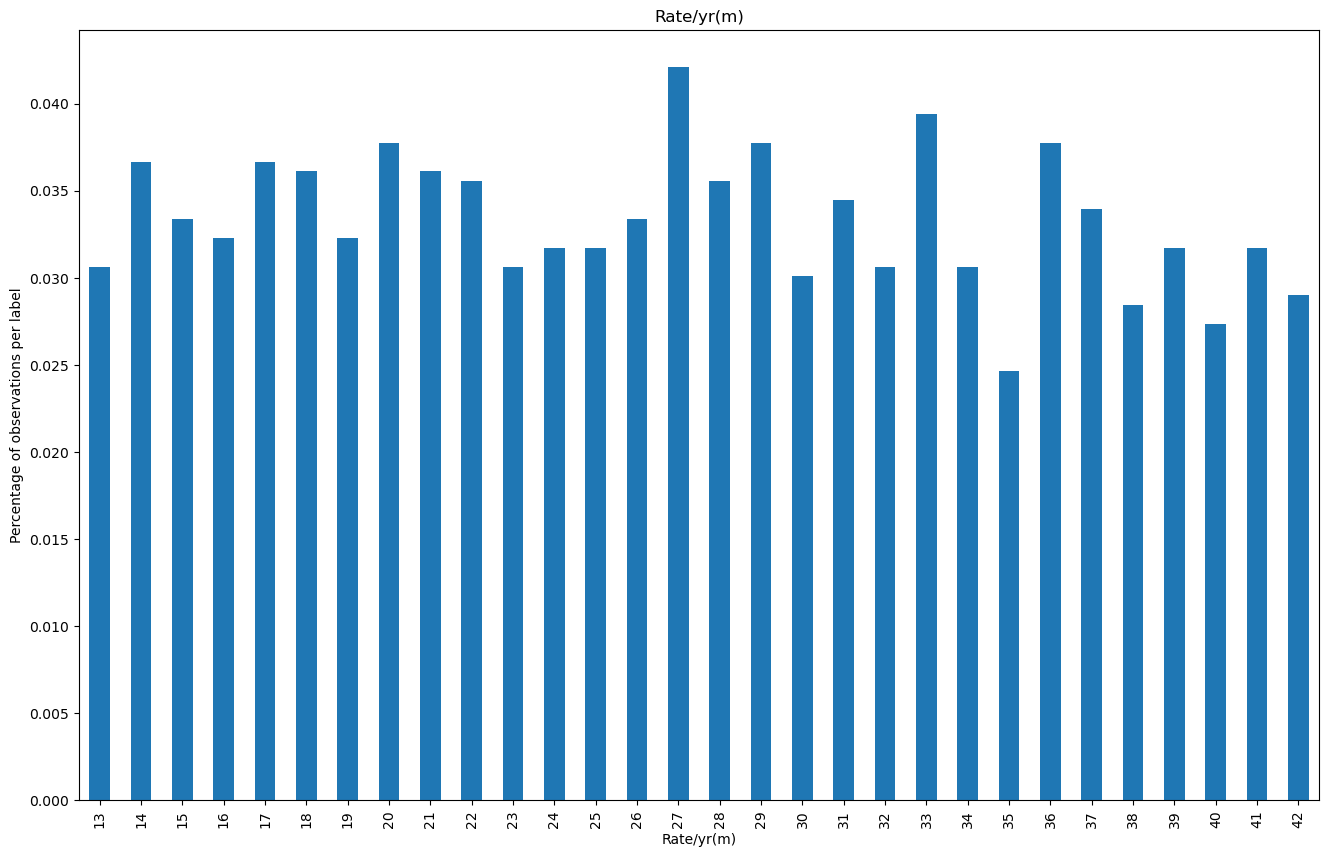

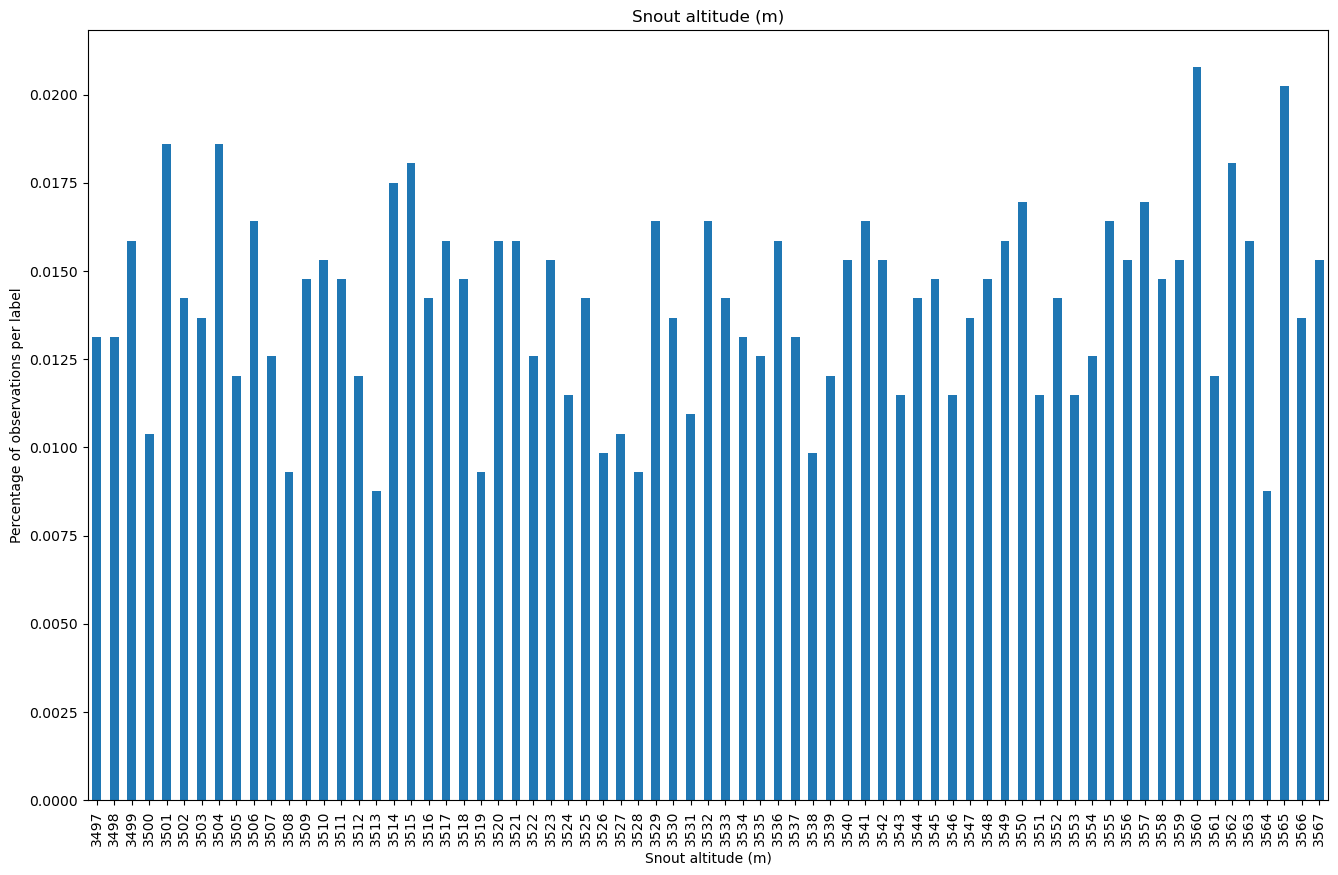

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()